In [82]:
import pandas as pd
from google.colab import files
upload = files.upload()


Saving AEP_hourly.csv to AEP_hourly (2).csv


In [83]:
listrik = pd.read_csv("AEP_hourly.csv")

listrik.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [84]:
listrik = listrik.sort_values('Datetime')
listrik

,Datetime,AEP_MW
2183,2004-10-01 01:00:00,12379.0
2184,2004-10-01 02:00:00,11935.0
2185,2004-10-01 03:00:00,11692.0
2186,2004-10-01 04:00:00,11597.0
2187,2004-10-01 05:00:00,11681.0
...,...,...
116157,2018-08-02 20:00:00,17673.0
116158,2018-08-02 21:00:00,17303.0
116159,2018-08-02 22:00:00,17001.0
116160,2018-08-02 23:00:00,15964.0


In [85]:
import pandas as pd

# Pastikan kolom 'Datetime' bertipe datetime dan jadi index
listrik['Datetime'] = pd.to_datetime(listrik['Datetime'])
listrik.set_index('Datetime', inplace=True)

# Split Train/Test
train = listrik[listrik.index.year <= 2013]
test = listrik[(listrik.index.year >= 2014) & (listrik.index.year <= 2018)]

# Cek hasil
print("Train:", train.index.min(), "s.d.", train.index.max())
print("Test :", test.index.min(), "s.d.", test.index.max())


Train: 2004-10-01 01:00:00 s.d. 2013-12-31 23:00:00
Test : 2014-01-01 00:00:00 s.d. 2018-08-03 00:00:00


In [86]:
train

,AEP_MW
Datetime,
2004-10-01 01:00:00,12379.0
2004-10-01 02:00:00,11935.0
2004-10-01 03:00:00,11692.0
2004-10-01 04:00:00,11597.0
2004-10-01 05:00:00,11681.0
...,...
2013-12-31 19:00:00,17722.0
2013-12-31 20:00:00,17462.0
2013-12-31 21:00:00,17138.0


In [87]:
# Resample ke per hari, misalnya dengan menjumlahkan atau merata-ratakan
train_perhari = train.resample('D').sum()
train_perhari


,AEP_MW
Datetime,
2004-10-01,328544.0
2004-10-02,311997.0
2004-10-03,293450.0
2004-10-04,343417.0
2004-10-05,346553.0
...,...
2013-12-27,379850.0
2013-12-28,356517.0
2013-12-29,336210.0


In [88]:
test

,AEP_MW
Datetime,
2014-01-01 00:00:00,15922.0
2014-01-01 01:00:00,15441.0
2014-01-01 02:00:00,15123.0
2014-01-01 03:00:00,15001.0
2014-01-01 04:00:00,15001.0
...,...
2018-08-02 20:00:00,17673.0
2018-08-02 21:00:00,17303.0
2018-08-02 22:00:00,17001.0


In [89]:
# Resample ke per hari, misalnya dengan menjumlahkan atau merata-ratakan
test_perhari = test.resample('D').sum()
test_perhari

,AEP_MW
Datetime,
2014-01-01,372302.0
2014-01-02,425658.0
2014-01-03,475042.0
2014-01-04,433614.0
2014-01-05,379906.0
...,...
2018-07-30,368834.0
2018-07-31,364327.0
2018-08-01,363628.0


In [90]:
from statsmodels.tsa.stattools import adfuller

# ADF test untuk kolom target (misal 'AEP_MW')
adf_result = adfuller(train_perhari['AEP_MW'])

print("ADF Test Statistic :", adf_result[0])
print("p-value            :", adf_result[1])
print("Critical Values    :", adf_result[4])


ADF Test Statistic : -6.40073154678464
p-value            : 1.9985741115268156e-08
Critical Values    : {'1%': np.float64(-3.4323035277087404), '5%': np.float64(-2.862403154462218), '10%': np.float64(-2.567229474181332)}


nonstasioner

In [91]:
from statsmodels.tsa.stattools import adfuller

# ADF test untuk kolom target (misal 'AEP_MW')
adf_result1 = adfuller(test_perhari['AEP_MW'])

print("ADF Test Statistic :", adf_result1[0])
print("p-value            :", adf_result1[1])
print("Critical Values    :", adf_result1[4])

ADF Test Statistic : -4.336908552746155
p-value            : 0.0003831907775449538
Critical Values    : {'1%': np.float64(-3.4343193954605002), '5%': np.float64(-2.8632932610713193), '10%': np.float64(-2.567703395408632)}


stasioner

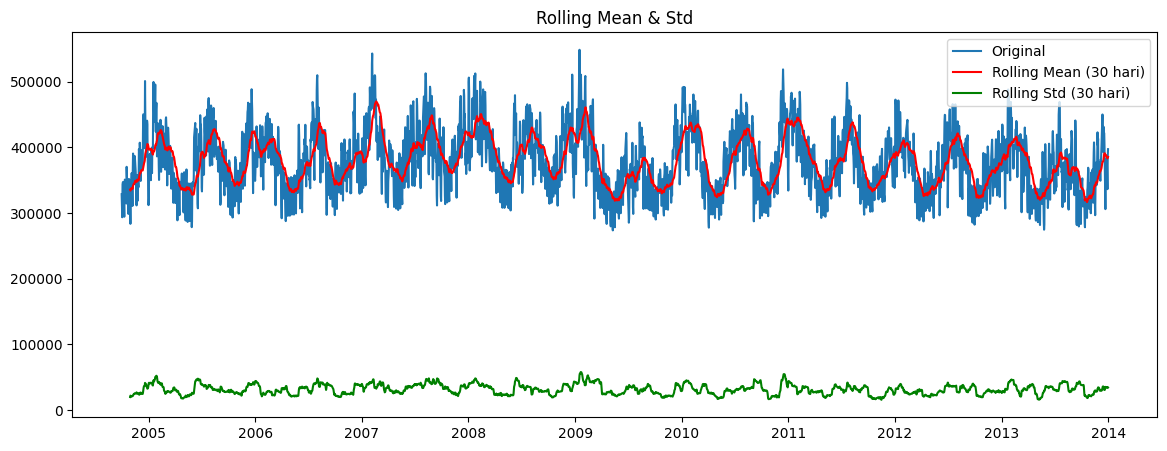

In [92]:
import matplotlib.pyplot as plt

rolling_mean = train_perhari['AEP_MW'].rolling(window=30).mean()
rolling_std = train_perhari['AEP_MW'].rolling(window=30).std()

plt.figure(figsize=(14, 5))
plt.plot(train_perhari['AEP_MW'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean (30 hari)', color='red')
plt.plot(rolling_std, label='Rolling Std (30 hari)', color='green')
plt.title("Rolling Mean & Std")
plt.legend()
plt.show()

In [139]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt


In [140]:
# Ambil data target
train_values = train_perhari['AEP_MW'].values.reshape(-1, 1)
test_values = test_perhari['AEP_MW'].values.reshape(-1, 1)

# Normalisasi
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_values)
test_scaled = scaler.transform(test_values)

# Buat fungsi sequence
def create_sequences(data, window_size=30):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

# Buat sequence input/output
X_train, y_train = create_sequences(train_scaled, window_size=30)
X_test, y_test = create_sequences(test_scaled, window_size=30)


In [95]:
model = Sequential()
model.add(SimpleRNN(50, activation='tanh', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0250
Epoch 2/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0072
Epoch 3/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0063
Epoch 4/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0052
Epoch 5/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0049
Epoch 6/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0045
Epoch 7/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0044
Epoch 8/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0045
Epoch 9/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0042
Epoch 10/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0042
Epoch 11/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0042
Epoch 12/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0044
Epoch 13/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0044
Epoch 14/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0044
Epoch 15/100
105/105 ━━━━━━━━━━━━━━━━━━━━

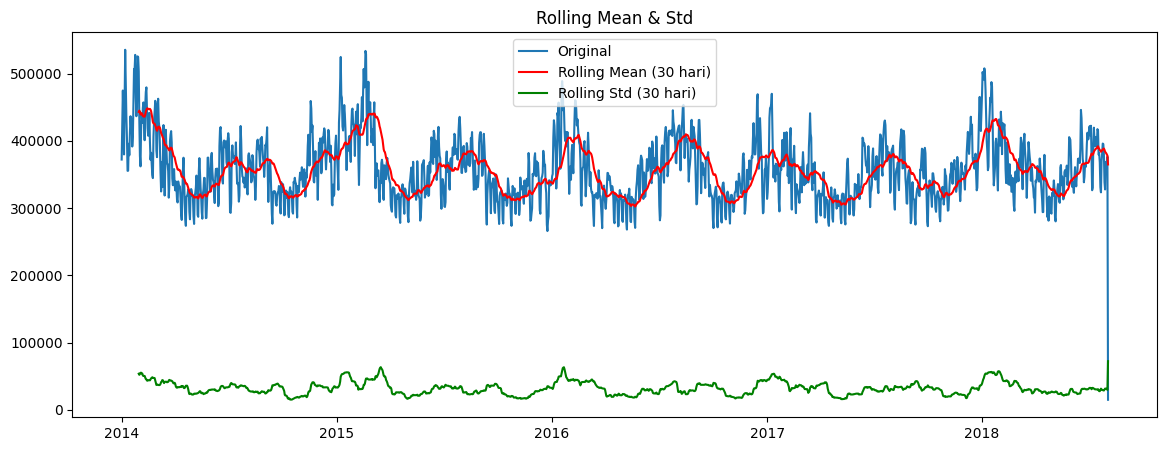

In [141]:
import matplotlib.pyplot as plt

rolling_mean = test_perhari['AEP_MW'].rolling(window=30).mean()
rolling_std = test_perhari['AEP_MW'].rolling(window=30).std()

plt.figure(figsize=(14, 5))
plt.plot(test_perhari['AEP_MW'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean (30 hari)', color='red')
plt.plot(rolling_std, label='Rolling Std (30 hari)', color='green')
plt.title("Rolling Mean & Std")
plt.legend()
plt.show()

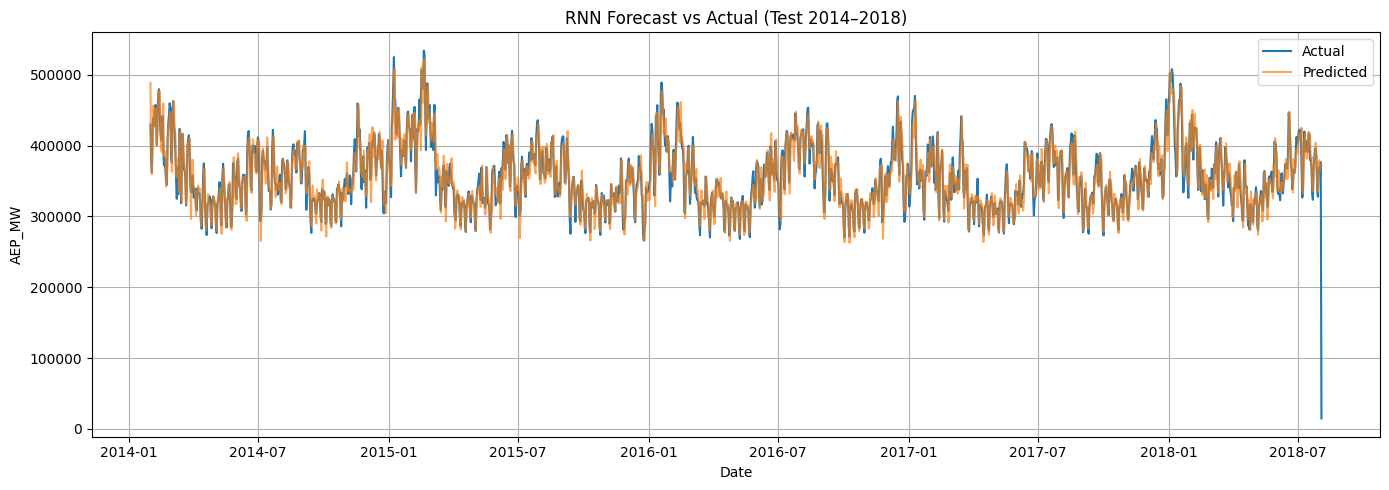

In [143]:
# Prediksi
# Data asli test_perhari (dengan index datetime)
y_test_actual = pd.Series(scaler.inverse_transform(y_test).flatten(), index=test_perhari.index[-len(y_test):])
y_pred = pd.Series(scaler.inverse_transform(y_pred_scaled).flatten(), index=test_perhari.index[-len(y_test):])

plt.figure(figsize=(14, 5))
plt.plot(y_test_actual, label='Actual')
plt.plot(y_pred, label='Predicted', alpha=0.7)
plt.title('RNN Forecast vs Actual (Test 2014–2018)')
plt.xlabel('Date')
plt.ylabel('AEP_MW')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [144]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
print(f'RMSE: {rmse:.2f}')


RMSE: 19579.95


In [99]:
relative_rmse = (rmse / y_test_actual.mean()) * 100
print(f"Relative RMSE: {relative_rmse:.2f}%")


Relative RMSE: 5.51%


In [150]:
def create_lag_features(df, col='AEP_MW', n_lags=30):
    df_lag = df.copy()
    for i in range(1, n_lags + 1):
        df_lag[f'lag_{i}'] = df_lag[col].shift(i)
    df_lag.dropna(inplace=True)
    return df_lag

# Buat lag features
train_lagged = create_lag_features(train_perhari, col='AEP_MW')
test_lagged = create_lag_features(test_perhari, col='AEP_MW')


In [151]:
X_train = train_lagged.drop(columns='AEP_MW')
y_train = train_lagged['AEP_MW']

X_test = test_lagged.drop(columns='AEP_MW')
y_test = test_lagged['AEP_MW']


In [152]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Train model
model = LGBMRegressor()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Hitung RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
relative_rmse = (rmse / y_test.mean()) * 100
print(f"RMSE: {rmse:.2f}")
print(f"Relative RMSE: {relative_rmse:.2f}%")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001091 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 3349, number of used features: 30
[LightGBM] [Info] Start training from score 379580.287250
RMSE: 21964.53
Relative RMSE: 6.18%


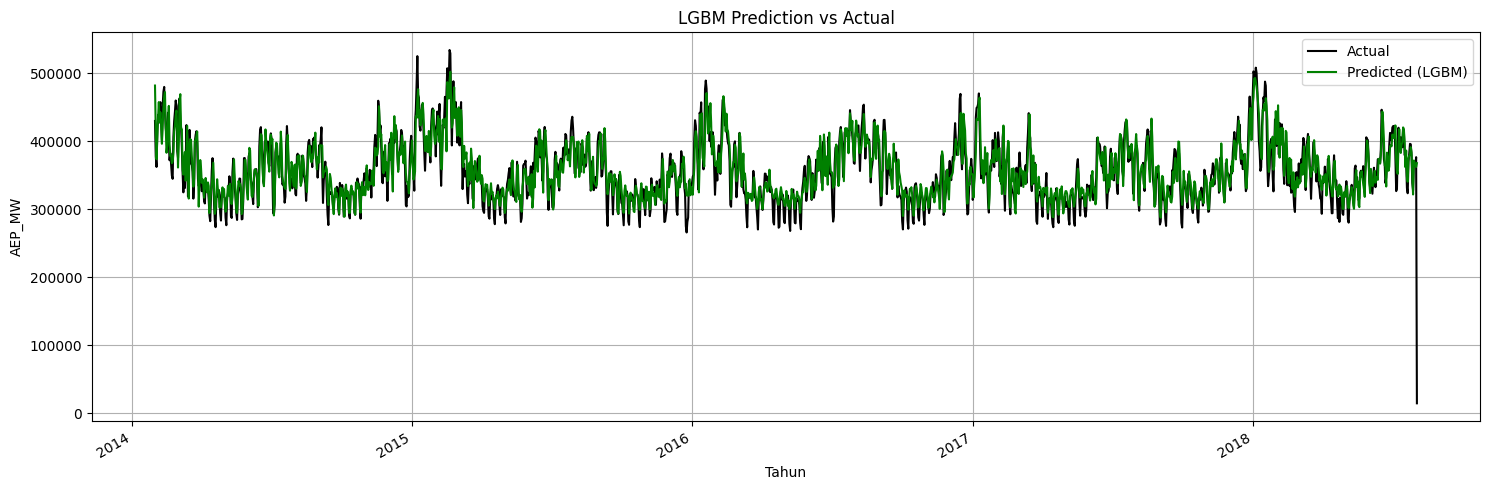

In [155]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Asumsikan index dari test_perhari adalah datetime
index_waktu = test_perhari.index[-len(y_test):]  # Ambil index sebanyak panjang y_test

# Buat series baru agar index waktu bisa digunakan
actual_series = pd.Series(y_test.values, index=index_waktu)
pred_series = pd.Series(y_pred, index=index_waktu)

# Plot dengan waktu
plt.figure(figsize=(15, 5))
plt.plot(actual_series.index, actual_series, label='Actual', color='black')
plt.plot(pred_series.index, pred_series, label='Predicted (LGBM)', color='green')
plt.title('LGBM Prediction vs Actual')
plt.xlabel('Tahun')
plt.ylabel('AEP_MW')
plt.legend()
plt.grid(True)

# Format x-axis ke tahun
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()


In [166]:
def create_lag_features(df, col='AEP_MW', n_lags=7):
    df_lag = df.copy()
    for i in range(1, n_lags + 1):
        df_lag[f'lag_{i}'] = df_lag[col].shift(i)
    df_lag.dropna(inplace=True)
    return df_lag

train_lagged = create_lag_features(train_perhari, 'AEP_MW', 7)
X_train_lgbm = train_lagged.drop(columns='AEP_MW')
y_train_lgbm = train_lagged['AEP_MW']

X_train_rnn = X_train_lgbm[[f'lag_{i}' for i in range(1, 8)]].values
X_train_rnn = X_train_rnn.reshape((X_train_rnn.shape[0], 7, 1))

# RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(32, input_shape=(7, 1)))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mse')
rnn_model.fit(X_train_rnn, y_train_lgbm.values, epochs=10, batch_size=32, verbose=0)

# Output dari RNN jadi fitur baru di LGBM
rnn_train_pred = rnn_model.predict(X_train_rnn)
X_train_lgbm['rnn_output'] = rnn_train_pred.ravel()

# Train LGBM
lgbm_model = LGBMRegressor()
lgbm_model.fit(X_train_lgbm, y_train_lgbm)


106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000267 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 3372, number of used features: 7
[LightGBM] [Info] Start training from score 379289.171115


LGBMRegressor()

In [167]:
test_lagged = create_lag_features(test_perhari, 'AEP_MW', 7)
X_test_lgbm = test_lagged.drop(columns='AEP_MW')
y_test_lgbm = test_lagged['AEP_MW']

X_test_rnn = X_test_lgbm[[f'lag_{i}' for i in range(1, 8)]].values
X_test_rnn = X_test_rnn.reshape((X_test_rnn.shape[0], 7, 1))

rnn_test_pred = rnn_model.predict(X_test_rnn)
X_test_lgbm['rnn_output'] = rnn_test_pred.ravel()

final_pred = lgbm_model.predict(X_test_lgbm)

# RMSE & Relative RMSE
rmse = np.sqrt(mean_squared_error(y_test_lgbm, final_pred))
relative_rmse = (rmse / y_test_lgbm.mean()) * 100
print(f"RMSE: {rmse:.2f}")
print(f"Relative RMSE: {relative_rmse:.2f}%")


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
RMSE: 23752.14
Relative RMSE: 6.66%


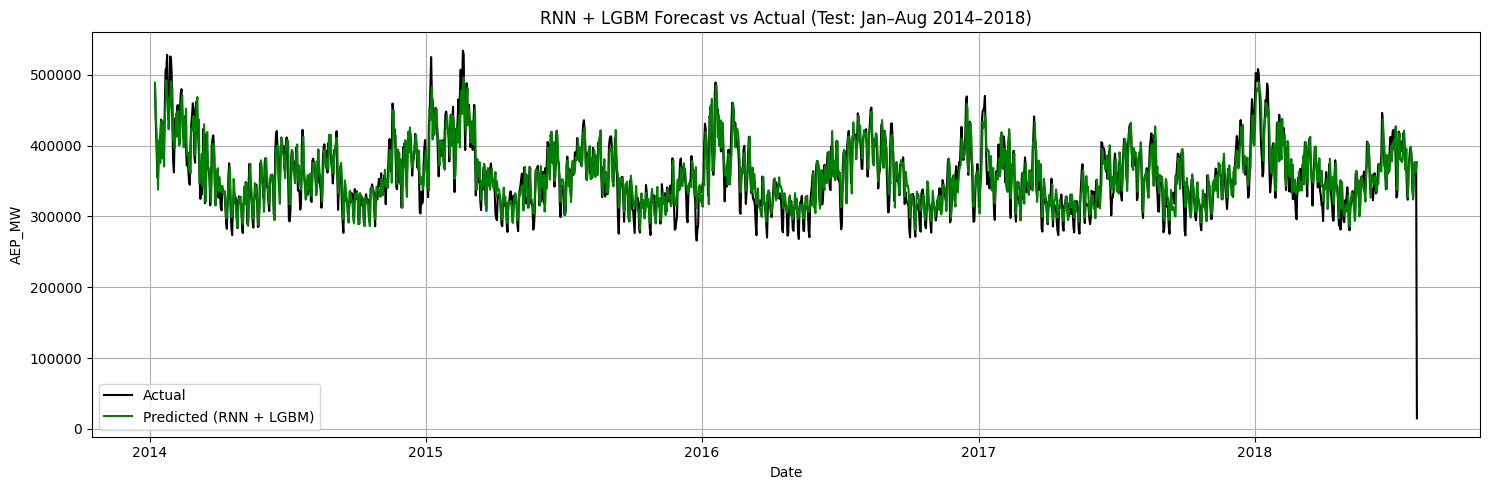

In [168]:
plt.figure(figsize=(15, 5))
plt.plot(y_test_lgbm.index, y_test_lgbm.values, label='Actual', color='black')
plt.plot(y_test_lgbm.index, final_pred, label='Predicted (RNN + LGBM)', color='green')
plt.title('RNN + LGBM Forecast vs Actual (Test: Jan–Aug 2014–2018)')
plt.xlabel('Date')
plt.ylabel('AEP_MW')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
